In [ ]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv


In [ ]:
df = pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv')
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,...,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

Обзор

In [ ]:
df['month'].value_counts()

3    150936
2    136979
0    132440
4    127691
1    127620
5    119323
6    108168
7     96843
Name: month, dtype: int64

<AxesSubplot:xlabel='customer_age', ylabel='count'>

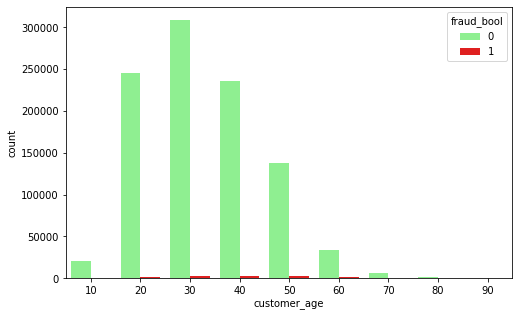

In [ ]:
sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
f, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = df['customer_age'], hue = df['fraud_bool'])

<AxesSubplot:xlabel='employment_status', ylabel='count'>

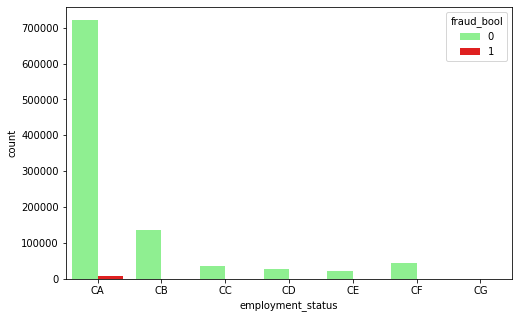

In [ ]:
sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
f, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = df['employment_status'], hue = df['fraud_bool'])

<AxesSubplot:xlabel='foreign_request', ylabel='count'>

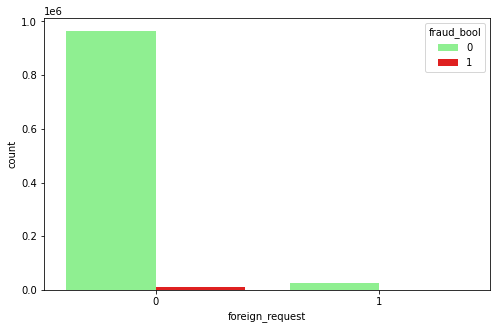

In [ ]:
sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
f, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = df['foreign_request'], hue = df['fraud_bool'])

In [ ]:
#sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
#f, ax = plt.subplots(figsize = (8, 5))
#sns.countplot(x = df['name_email_similarity'], hue = df['fraud_bool'])

<AxesSubplot:xlabel='income', ylabel='count'>

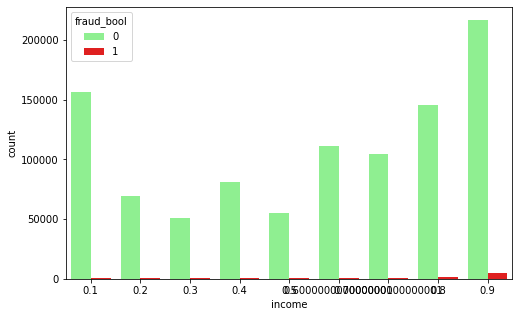

In [ ]:
sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
f, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = df['income'], hue = df['fraud_bool'])

<AxesSubplot:xlabel='payment_type', ylabel='count'>

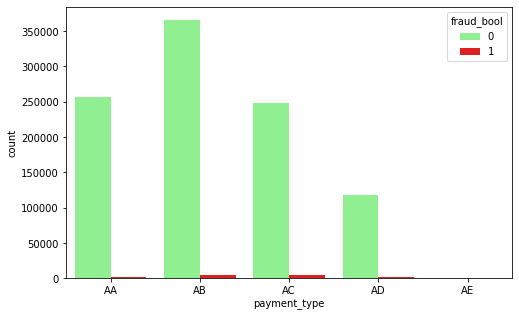

In [ ]:
sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
f, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = df['payment_type'], hue = df['fraud_bool'])

<AxesSubplot:xlabel='zip_count_4w', ylabel='count'>

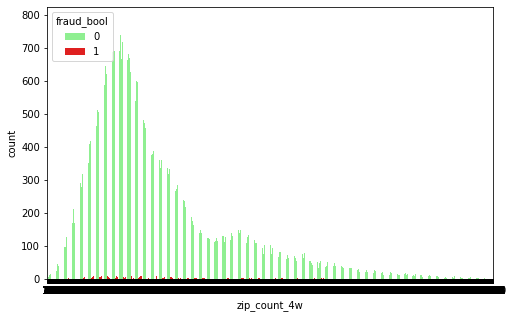

In [ ]:
sns.set_palette(sns.color_palette(["#7FFF82", "#FF0000"]))
f, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = df['zip_count_4w'], hue = df['fraud_bool'])

In [ ]:
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,...,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


In [ ]:
y = df["fraud_bool"]
X = df.drop(["fraud_bool", "device_os", "device_fraud_count", "month"], axis = 1)
X = pd.get_dummies(X)
X

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP
0,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,3134.319630,...,0,1,0,0,0,0,0,0,1,0
1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,2670.918292,...,0,1,0,0,0,0,0,0,1,0
2,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,2893.621498,...,0,1,0,0,0,0,0,0,1,0
3,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,4054.908412,...,0,1,0,0,0,0,0,0,1,0
4,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,2728.237159,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.6,0.192631,-1,104,40,0.030592,-1.044454,804,7905.711839,8341.468557,...,0,0,0,1,0,0,0,0,1,0
999996,0.8,0.322989,148,9,50,1.628119,-1.409803,3306,5391.470463,4955.170808,...,0,0,0,1,0,0,0,0,1,0
999997,0.8,0.879403,-1,30,20,0.018563,34.692760,1522,8063.102636,5670.654316,...,0,0,0,1,0,0,0,0,1,0
999998,0.9,0.762112,-1,189,20,0.015352,94.661055,1418,8092.641762,3982.582204,...,0,1,0,0,0,0,0,0,1,0


Тесты

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
labelencoder = LabelEncoder()
y_train =  labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_p_knn = knn.predict(X_test)
accuracy_score(y_test, y_p_knn)

0.988885

In [ ]:
lr = LogisticRegression(solver="saga").fit(X_train, y_train)
y_p_lr = lr.predict(X_test)
accuracy_score(y_test, y_p_lr)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.98921

In [ ]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_p_decision_tree = decision_tree.predict(X_test)
accuracy_score(y_test, y_p_decision_tree)

0.977485

In [ ]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
y_p_random_forest = random_forest.predict(X_test)
accuracy_score(y_test, y_p_random_forest)

0.989145